In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import re
from collections import Counter
import matplotlib.pyplot as plt

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [6]:
df_full = pd.read_csv('./Emo_data/total_emotion_data.csv', encoding='utf-8')

In [7]:
df_full

,Text,Emotion
0,waitress went last month,1
1,chris says closing bar,4
2,coffee gon na hang,5
3,um mm yeah right,3
4,oh god oh god poor monica,1
...,...,...
134871,classified dsm 5 mental disorder,4
134872,sadly everything thrown around room everytime ...,4
134873,pity anything life actually pretty okay genera...,4
134874,lul 3rd time ajax lost team busan unlucky,4


In [8]:
df_full['Emotion'].value_counts()

5    33927
3    31662
2    22620
4    19939
6    17322
1     9406
Name: Emotion, dtype: int64

In [15]:
# df_full.to_csv('./Emotions dataset for NLP/Emotion_final.csv')

In [9]:
df_full['Emotion'] = df_full['Emotion'].map({1 : 1 , 2 : 1 , 3 : 1 , 4 : 0 , 5 : 0 , 6 : 0})

In [10]:
df_full

,Text,Emotion
0,waitress went last month,1
1,chris says closing bar,0
2,coffee gon na hang,0
3,um mm yeah right,1
4,oh god oh god poor monica,1
...,...,...
134871,classified dsm 5 mental disorder,0
134872,sadly everything thrown around room everytime ...,0
134873,pity anything life actually pretty okay genera...,0
134874,lul 3rd time ajax lost team busan unlucky,0


In [11]:
import text_hammer as th

In [12]:
from tqdm._tqdm_notebook import tqdm_notebook
tqdm_notebook.pandas()

def text_preprocessing(df,col_name):
    column = col_name
    df[column] = df[column].progress_apply(lambda x:str(x).lower())
    df[column] = df[column].progress_apply(lambda x: th.cont_exp(x)) #you're -> you are; i'm -> i am
    df[column] = df[column].progress_apply(lambda x: th.remove_emails(x))
#     df[column] = df[column].progress_apply(lambda x: th.remove_html_tags(x))
#     df[column] = df[column].progress_apply(lambda x: ps.remove_stopwords(x))

    df[column] = df[column].progress_apply(lambda x: th.remove_special_chars(x))
    df[column] = df[column].progress_apply(lambda x: th.remove_accented_chars(x))
#     df[column] = df[column].progress_apply(lambda x: th.make_base(x)) #ran -> run,
    return(df)

In [13]:
df_cleaned = text_preprocessing(df_full,'Emotion')

  0%|          | 0/134876 [00:00<?, ?it/s]

  0%|          | 0/134876 [00:00<?, ?it/s]

  0%|          | 0/134876 [00:00<?, ?it/s]

  0%|          | 0/134876 [00:00<?, ?it/s]

  0%|          | 0/134876 [00:00<?, ?it/s]

In [14]:
df_cleaned = df_cleaned.copy()

In [15]:
df_cleaned

,Text,Emotion
0,waitress went last month,1
1,chris says closing bar,0
2,coffee gon na hang,0
3,um mm yeah right,1
4,oh god oh god poor monica,1
...,...,...
134871,classified dsm 5 mental disorder,0
134872,sadly everything thrown around room everytime ...,0
134873,pity anything life actually pretty okay genera...,0
134874,lul 3rd time ajax lost team busan unlucky,0


In [16]:
df_cleaned['num_words'] = df_cleaned.Text.apply(lambda x:len(x.split()))

In [17]:
df_cleaned

,Text,Emotion,num_words
0,waitress went last month,1,4
1,chris says closing bar,0,4
2,coffee gon na hang,0,4
3,um mm yeah right,1,4
4,oh god oh god poor monica,1,6
...,...,...,...
134871,classified dsm 5 mental disorder,0,5
134872,sadly everything thrown around room everytime ...,0,10
134873,pity anything life actually pretty okay genera...,0,12
134874,lul 3rd time ajax lost team busan unlucky,0,8


In [18]:
df_cleaned['num_words'].value_counts().sort_values()

990        1
60         1
39         1
41         1
51         1
735        1
53         1
37         1
43         2
38         2
35         3
36         5
34         5
33         6
32        20
1         27
31        30
30        41
29        71
28       123
27       156
26       184
25       241
24       296
23       329
22       344
21       384
20       466
19       575
18       721
17       985
16      1431
2       1690
15      2225
14      3339
13      4710
12      6329
11      7950
10      9627
3      10345
9      11189
8      12633
7      13827
4      14690
6      14782
5      15085
Name: num_words, dtype: int64

In [19]:
#단어 수 확인하고 비정상적으로 많은 것들 제거.
df_cleaned = df_cleaned[df_cleaned['num_words'] < 735]
df_cleaned

,Text,Emotion,num_words
0,waitress went last month,1,4
1,chris says closing bar,0,4
2,coffee gon na hang,0,4
3,um mm yeah right,1,4
4,oh god oh god poor monica,1,6
...,...,...,...
134871,classified dsm 5 mental disorder,0,5
134872,sadly everything thrown around room everytime ...,0,10
134873,pity anything life actually pretty okay genera...,0,12
134874,lul 3rd time ajax lost team busan unlucky,0,8


<Axes: >

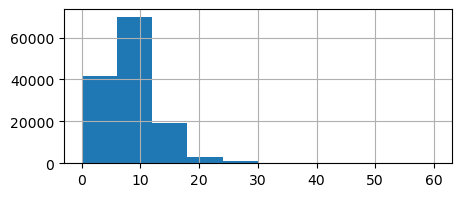

In [20]:
# 단어 수 분포 확인
df_cleaned['num_words'].hist(figsize=(5,2), bins=10, range=[0, 60])

In [21]:
df_cleaned.num_words.max()

60

In [41]:
df_cleaned['num_words'] = df_cleaned['num_words'].astype('int')
df_cleaned['Emotion'] = df_cleaned['Emotion'].astype('float') 

In [43]:
from sklearn.model_selection import train_test_split
data_train,data_test = train_test_split(df_cleaned, test_size = 0.3, random_state = 42, stratify = df_cleaned.Emotion)
# stratify값을 target 값으로 지정해주면 target의 class 비율을 유지 한 채로 데이터 셋을 split 하게 됩니다. 만약 이 옵션을 지정해주지 않고 classification 문제를 다룬다면, 성능의 차이가 많이 날 수 있습니다.

In [45]:
from transformers import AutoTokenizer,TFBertModel
tokenizer = AutoTokenizer.from_pretrained('bert-base-cased')
bert = TFBertModel.from_pretrained('bert-base-cased')

Some layers from the model checkpoint at bert-base-cased were not used when initializing TFBertModel: ['mlm___cls', 'nsp___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertModel were initialized from the model checkpoint at bert-base-cased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training.


In [46]:
tokenizer.save_pretrained('bert-tokenizer')
bert.save_pretrained('bert-model')

In [47]:
from transformers import BertTokenizer, TFBertModel, BertConfig,TFDistilBertModel,DistilBertTokenizer,DistilBertConfig
dbert_model = TFDistilBertModel.from_pretrained('distilbert-base-uncased')

Some layers from the model checkpoint at distilbert-base-uncased were not used when initializing TFDistilBertModel: ['vocab_projector', 'vocab_layer_norm', 'activation_13', 'vocab_transform']
- This IS expected if you are initializing TFDistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFDistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFDistilBertModel were initialized from the model checkpoint at distilbert-base-uncased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFDistilBertModel for predictions without further training.


In [48]:
x_train = tokenizer(
    text=data_train.Text.tolist(),
    add_special_tokens=True,
    max_length=70,
    truncation=True,
    padding=True, 
    return_tensors='tf',
    return_token_type_ids = False,
    return_attention_mask = True,
    verbose = True)


x_test = tokenizer(
    text=data_test.Text.tolist(),
    add_special_tokens=True,
    max_length=70,
    truncation=True,
    padding=True, 
    return_tensors='tf',
    return_token_type_ids = False,
    return_attention_mask = True,
    verbose = True)

In [49]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.initializers import TruncatedNormal
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.metrics import Accuracy

In [50]:
import tensorflow as tf
tf.config.experimental.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [51]:
max_len = 70
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense

input_ids = Input(shape=(max_len,), dtype=tf.int32, name="input_ids")
input_mask = Input(shape=(max_len,), dtype=tf.int32, name="attention_mask")
# embeddings = dbert_model(input_ids,attention_mask = input_mask)[0]


embeddings = bert(input_ids,attention_mask = input_mask)[0] #(0 is the last hidden states,1 means pooler_output)
out = tf.keras.layers.GlobalMaxPool1D()(embeddings)
out = Dense(128, activation='relu')(out)
out = tf.keras.layers.Dropout(0.1)(out)
out = Dense(32,activation = 'relu')(out)

y = Dense(1,activation = 'sigmoid')(out)
    
model = tf.keras.Model(inputs=[input_ids, input_mask], outputs=y)
model.layers[2].trainable = True
# for training bert our lr must be so small

In [52]:
optimizer = tf.keras.optimizers.legacy.Adam(
    learning_rate=5e-05, # this learning rate is for bert model , taken from huggingface website 
    epsilon=1e-08,
    decay=0.01,
    clipnorm=1.0)

# Set loss and metrics
loss = tf.keras.losses.BinaryCrossentropy(from_logits=True)
# Compile the model
model.compile(
    optimizer = optimizer,
    loss = loss, 
    metrics = ['accuracy'])

In [53]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_ids (InputLayer)         [(None, 70)]         0           []                               
                                                                                                  
 attention_mask (InputLayer)    [(None, 70)]         0           []                               
                                                                                                  
 tf_bert_model_1 (TFBertModel)  TFBaseModelOutputWi  108310272   ['input_ids[0][0]',              
                                thPoolingAndCrossAt               'attention_mask[0][0]']         
                                tentions(last_hidde                                               
                                n_state=(None, 70,                                          

In [54]:
tf.config.experimental_run_functions_eagerly(True)
tf.config.run_functions_eagerly(True)

In [55]:
train_history = model.fit(
    x ={'input_ids':x_train['input_ids'],'attention_mask':x_train['attention_mask']} ,
    y = data_train.Emotion,
    validation_data = (
    {'input_ids':x_test['input_ids'],'attention_mask':x_test['attention_mask']}, data_test.Emotion),
  epochs=1,
    batch_size=36
)

2623/2623 [==============================] - 1829s 697ms/step - loss: 0.4980 - accuracy: 0.7591 - val_loss: 0.4775 - val_accuracy: 0.7707


In [57]:
model.save_weights('./binary_model_checkpoint/binary_sentiment_weights')

In [58]:
predicted_raw = model.predict({'input_ids':x_test['input_ids'],'attention_mask':x_test['attention_mask']})

1265/1265 [==============================] - 192s 152ms/step


In [59]:
predicted_raw

array([[0.9663048 ],
       [0.05048301],
       [0.37935537],
       ...,
       [0.49955395],
       [0.52448535],
       [0.64858675]], dtype=float32)

In [60]:
np.round(predicted_raw[0] , 0)

array([1.], dtype=float32)

In [61]:
y_predicted = np.around(predicted_raw,0)
y_predicted  = np.ravel(y_predicted)

In [62]:
y_predicted

array([1., 0., 0., ..., 0., 1., 1.], dtype=float32)

In [63]:
from sklearn.metrics import classification_report

In [65]:
print(classification_report(data_test.Emotion, y_predicted))

              precision    recall  f1-score   support

         0.0       0.76      0.84      0.79     21356
         1.0       0.79      0.70      0.74     19107

    accuracy                           0.77     40463
   macro avg       0.77      0.77      0.77     40463
weighted avg       0.77      0.77      0.77     40463



In [66]:
def emotion_predict(sentence):
    x_val = tokenizer(
        text=sentence,
        add_special_tokens=True,
        max_length=70,
        truncation=True,
        padding='max_length', 
        return_tensors='tf',
        return_token_type_ids = False,
        return_attention_mask = True,
        verbose = True)
    predict_value = model.predict({'input_ids':x_val['input_ids'],'attention_mask':x_val['attention_mask']})
    predict_answer = np.round(predict_value[0],0)
    
    if predict_answer == 0:
        print("{} : 0 ".format(sentence)) 
        #print("(부정 확률 : %.2f) 부정적인 감정입니다." % (1-predict_value))
        return 0
    elif predict_answer == 1:
        print("{} : 1".format(sentence))
        #print("(긍정 확률 : %.2f) 긍정적인 감정입니다." % predict_value)
        return 1

In [67]:
test_case = ["And I think you should be somethin'",
 'Maybe you should know that',
 "And I've been so caught up in my job didn't see what's going on",
 'And I never like to admit that I was wrong',
 'And now I know',
 "And baby I'll be movin' on",
 'For all the times that you rained on my parade',
 'And every time you told me my opinion was wrong',
 "I don't wanna hold back",
 'But when you told me that you hated my friends',
 "'Cause I didn't want anyone thinking I still care",
 "I fell in love now I feel nothin' at all",
 'And all the clubs you get in using my name',
 "I'm better sleeping on my own",
 'I never felt so low and I was vulnerable',
 "And I didn't wanna write a song",
 'The only problem was with you and not them',
 'You should go and love yourself',
 'For all the times that you made me feel small',
 "You think I'm crying on my own well I ain't",
 'You think you broke my heart oh girl for goodness sake',
 "I don't but you still hit my phone up",
 'And tried to make me forget where I came from',
 'Oh baby you should go and love yourself',
 "'Cause if you like the way you look that much",
 'Was I a fool to let you break down my walls',
 "My mama don't like you and she likes everyone",
 "And if you think that I'm still holdin' on to somethin'"]

In [68]:
for i in test_case:
    emotion_predict(i)

1/1 [==============================] - 0s 165ms/step
And I think you should be somethin' : 0 
1/1 [==============================] - 0s 176ms/step
Maybe you should know that : 1
1/1 [==============================] - 0s 169ms/step
And I've been so caught up in my job didn't see what's going on : 0 
1/1 [==============================] - 0s 172ms/step
And I never like to admit that I was wrong : 0 
1/1 [==============================] - 0s 165ms/step
And now I know : 0 
1/1 [==============================] - 0s 172ms/step
And baby I'll be movin' on : 1
1/1 [==============================] - 0s 168ms/step
For all the times that you rained on my parade : 0 
1/1 [==============================] - 0s 174ms/step
And every time you told me my opinion was wrong : 0 
1/1 [==============================] - 0s 183ms/step
I don't wanna hold back : 0 
1/1 [==============================] - 0s 170ms/step
But when you told me that you hated my friends : 0 
1/1 [==============================] - 0s 16

In [69]:
kisch_review = pd.read_csv('kitsch_eng_review.csv', index_col=None)

In [70]:
kisch_review = kisch_review['0'].tolist()

In [71]:
for i in kisch_review:
    emotion_predict(i)

1/1 [==============================] - 0s 173ms/step
Liz deserves more lines why is starship unfair to Liz : 0 
1/1 [==============================] - 0s 169ms/step
what does it mean : 0 
1/1 [==============================] - 0s 163ms/step
Can someone inform me what a kitsch is : 0 
1/1 [==============================] - 0s 160ms/step
What a great song : 1
1/1 [==============================] - 0s 165ms/step
Full Album on April th : 0 
1/1 [==============================] - 0s 161ms/step
A music video literally never angered me more I love these girls and it s no fault of them but what the label is doing to this group is so shameful Poor Liz got no screen time or lines in the song I repeatedly saw the same girls over and over in this video while she was hidden They couldn t try any harder to hide her It s horrible Someone pick this girl up under a new group so she can be allowed to shine I m so tired of certain girls in this group being so praised by the label while Liz is treated lik